In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img,img_to_array

In [2]:
pwd

'C:\\Users\\ganesh appu\\Downloads\\intern_task\\images'

In [3]:
pic_size = 48
b_path = 'C:\\Users\\ganesh appu\\Downloads\\intern_task\\images\\images\\'

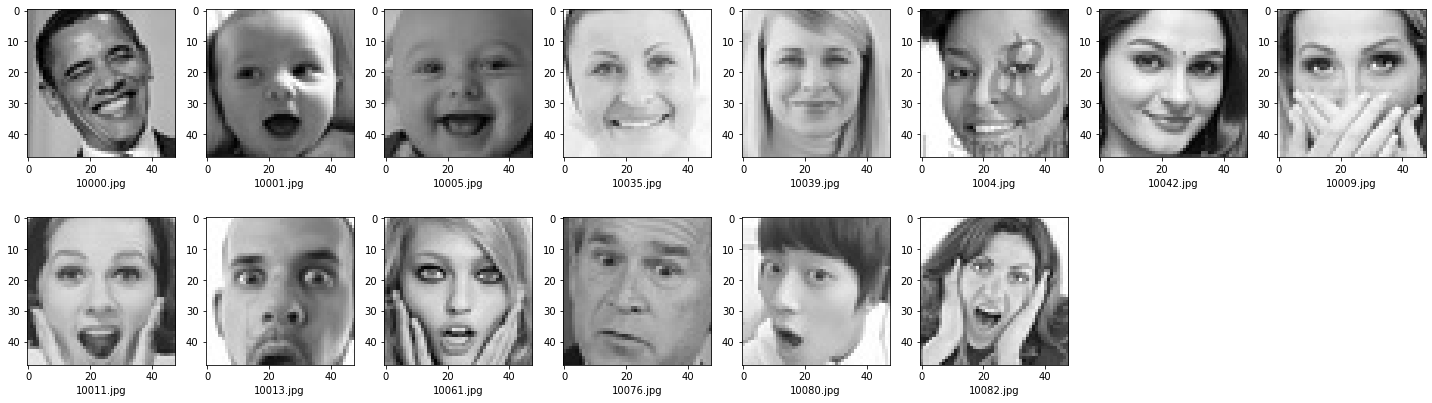

In [4]:
plt.figure(0,figsize=(20,20))
cpt=0
required_exxp = ['happy','surprise']
for expression in required_exxp:
    for i in range(1,8):
        cpt += 1
        plt.subplot(7,8,cpt)
        img=load_img(b_path+"train\\"+expression+"\\"+os.listdir(b_path+"train\\"+expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img,cmap='gray')
        plt.xlabel(os.listdir(b_path+"train\\"+expression)[i])
plt.tight_layout()
plt.show()

In [5]:
for expression in required_exxp:
    print(str(len(os.listdir(b_path + "train\\" + expression)))+" "+expression+" images")

7164 happy images
3205 surprise images


In [6]:
from keras.preprocessing.image import ImageDataGenerator as IDG

In [7]:
train_dat = IDG()
val_dat = IDG()
batch_size = 128
train_gen = train_dat.flow_from_directory(b_path+"train",target_size=(pic_size,pic_size)
                                          ,color_mode="grayscale",batch_size=batch_size,
                                          class_mode="categorical",shuffle=True)
val_gen = val_dat.flow_from_directory(b_path+"validation",target_size=(pic_size,pic_size),
                                       color_mode="grayscale",batch_size=batch_size,
                                       class_mode="categorical",shuffle=False)

Found 15351 images belonging to 3 classes.
Found 3838 images belonging to 3 classes.


In [8]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [9]:
n_classes = 3
#layer 1
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [31]:
epochs = 48
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size
                              ,epochs=epochs,validation_data = val_gen,validation_steps=val_gen.n//val_gen.batch_size,
                             callbacks = callbacks_list)

Epoch 1/48
119/119 [==============================] - 344s 3s/step - loss: 1.2696 - accuracy: 0.4047 - val_loss: 0.9153 - val_accuracy: 0.5606
Epoch 2/48
119/119 [==============================] - 309s 3s/step - loss: 1.0252 - accuracy: 0.5239 - val_loss: 0.8346 - val_accuracy: 0.6118
Epoch 3/48
119/119 [==============================] - 313s 3s/step - loss: 0.9105 - accuracy: 0.5970 - val_loss: 0.8264 - val_accuracy: 0.6479
Epoch 4/48
119/119 [==============================] - 313s 3s/step - loss: 0.8239 - accuracy: 0.6452 - val_loss: 0.8163 - val_accuracy: 0.6703
Epoch 5/48
119/119 [==============================] - 313s 3s/step - loss: 0.7689 - accuracy: 0.6674 - val_loss: 0.8597 - val_accuracy: 0.6727
Epoch 6/48
119/119 [==============================] - 312s 3s/step - loss: 0.7188 - accuracy: 0.6978 - val_loss: 0.7027 - val_accuracy: 0.7212
Epoch 7/48
119/119 [==============================] - 310s 3s/step - loss: 0.6852 - accuracy: 0.7083 - val_loss: 0.6435 - val_accuracy: 0.7427

Epoch 38/48
119/119 [==============================] - 310s 3s/step - loss: 0.2539 - accuracy: 0.9008 - val_loss: 0.4041 - val_accuracy: 0.8580
Epoch 39/48
119/119 [==============================] - 309s 3s/step - loss: 0.2554 - accuracy: 0.8992 - val_loss: 0.4480 - val_accuracy: 0.8486
Epoch 40/48
119/119 [==============================] - 335s 3s/step - loss: 0.2450 - accuracy: 0.9056 - val_loss: 0.4628 - val_accuracy: 0.8475
Epoch 41/48
119/119 [==============================] - 317s 3s/step - loss: 0.2286 - accuracy: 0.9127 - val_loss: 0.4382 - val_accuracy: 0.8521
Epoch 42/48
119/119 [==============================] - 315s 3s/step - loss: 0.2198 - accuracy: 0.9171 - val_loss: 0.4368 - val_accuracy: 0.8588
Epoch 43/48
  5/119 [>.............................] - ETA: 4:39 - loss: 0.2339 - accuracy: 0.9092

KeyboardInterrupt: 

In [10]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [10]:
model.load_weights('model.h5')

In [11]:
class_labels = val_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

{0: 'happy', 1: 'neutral', 2: 'surprise'}


In [13]:
import cv2

happy


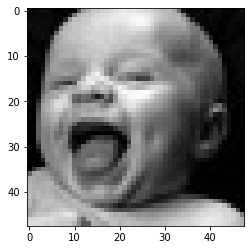

In [23]:
imm = cv2.imread('103.jpg',cv2.IMREAD_GRAYSCALE)
imm = imm/255
roi = img_to_array(imm)
roi = np.expand_dims(roi, axis=0)
preds = model.predict(roi)[0]
print(class_labels[preds.argmax()])
plt.imshow(imm,cmap='gray')

[[1.         0.98823529 1.         ... 0.18823529 0.11372549 0.08235294]
 [1.         1.         0.98039216 ... 0.14509804 0.11372549 0.0745098 ]
 [0.98431373 1.         0.98431373 ... 0.14901961 0.11764706 0.07843137]
 ...
 [0.11372549 0.1254902  0.13333333 ... 0.12941176 0.13333333 0.13333333]
 [0.10980392 0.11372549 0.14509804 ... 0.13333333 0.13333333 0.1254902 ]
 [0.10588235 0.14509804 0.1372549  ... 0.14117647 0.15294118 0.15294118]]
happy


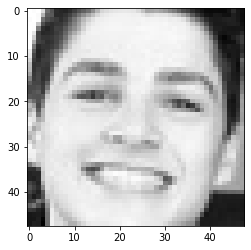

In [25]:
import cv2
test_img = cv2.imread(b_path+'train\\happy\\67.jpg',cv2.IMREAD_GRAYSCALE)/255
print(test_img)
roi = img_to_array(test_img)
roi = np.expand_dims(roi, axis=0)
preds = model.predict(roi)[0]
print(class_labels[preds.argmax()])
plt.imshow(test_img,cmap='gray')